# Tim DeChant
# ECE 601 - Dr. Gray
# Homework #3
 Due 9/21/2017

### 1. **Condition Numbers and Error Gains**: Consider the linear system of equations $Ax = b$, where $$A = \begin{bmatrix} 2 & -2 \\ -2 & 1 \end{bmatrix}.$$  

#### (a) Compute the condition number $c(A)$ of $A$.

$$
\begin{aligned}
det(A-\lambda I) = 0 & = & (2-\lambda)(1-\lambda)-4        \\
                     & = & \lambda^2 - 3\lambda -2     \\ \\
\end{aligned}                 
$$
$$
\begin{aligned}
 \lambda=\frac{3+\sqrt{17}}{2} && \text{or} && \lambda=\frac{3-\sqrt{17}}{2}       \\ \\
\end{aligned}                 
$$
$$
A=A^T \rightarrow c(A) = \frac{\left|\lambda_{max}\right|}{\left|\lambda_{min}\right|}
                       = \frac{3+\sqrt{17}}{\sqrt{17}-3}
                       = \frac{13+3\sqrt{17}}{4} \approx 6.342
$$

In [1]:
A = [2 -2; -2 1];
lambda = abs(eig(A));
c = max(lambda)/min(lambda)


c =

    6.3423



#### (b) Determine specific vectors $b$ and $\Delta b$ so that the following equations are satisfied:

$$
\frac{||\Delta x||}{||x||} = c(A) \frac{||\Delta b||}{||b||}\\
$$
Here $b$ and $\Delta b$ will be the products of the max/min eigenvalue/eigenvector pairs ($\lambda_{max} x_{max},\lambda_{min} x_{min}$) for $A$:

In [2]:
[v,d] = eig(A);
l=diag(d);
l_abs=abs(l);
[l_min,i_min] = min(abs(l));
[l_max,i_max] = max(abs(l));
x       = v(:,[i_max]);
delta_x = v(:,[i_min]);
b       = l(i_max)*x
delta_b = l(i_min)*delta_x
error = norm(delta_x)/norm(x) - c * norm(delta_b)/norm(b)


b =

   -2.8072
    2.1918


delta_b =

    0.3456
    0.4426


error =

  -2.2204e-16



$$
\frac{||\Delta x||}{||x||} = \frac{1}{c(A)} \frac{||\Delta b||}{||b||}\\
$$
Here the minimum eigenvector is used for $x$ and the maximum for $\Delta x$, so $b$ and $\Delta b$ are also swapped:

In [3]:
x       = v(:,[i_min]);
delta_x = v(:,[i_max]);
b       = l(i_min)*x
delta_b = l(i_max)*delta_x
error = norm(delta_x)/norm(x) - 1/c * norm(delta_b)/norm(b)


b =

    0.3456
    0.4426


delta_b =

   -2.8072
    2.1918


error =

     0



### 2. Spectral Versus Singular Value Decomposition: Consider a linear operator $A$ with matrix representation $$A = \begin{bmatrix} 1 & 3 \\ 7 & -1 \end{bmatrix}.$$  

#### (a) Compute the spectral decomposition and singular value decomposition of $A$.

#### (b)  Sketch $\mathcal{A}(S^1)$, the image of the unit circle under $ A$.


v =

    0.6308   -0.4664
    0.7760    0.8846


d =

    4.6904         0
         0   -4.6904



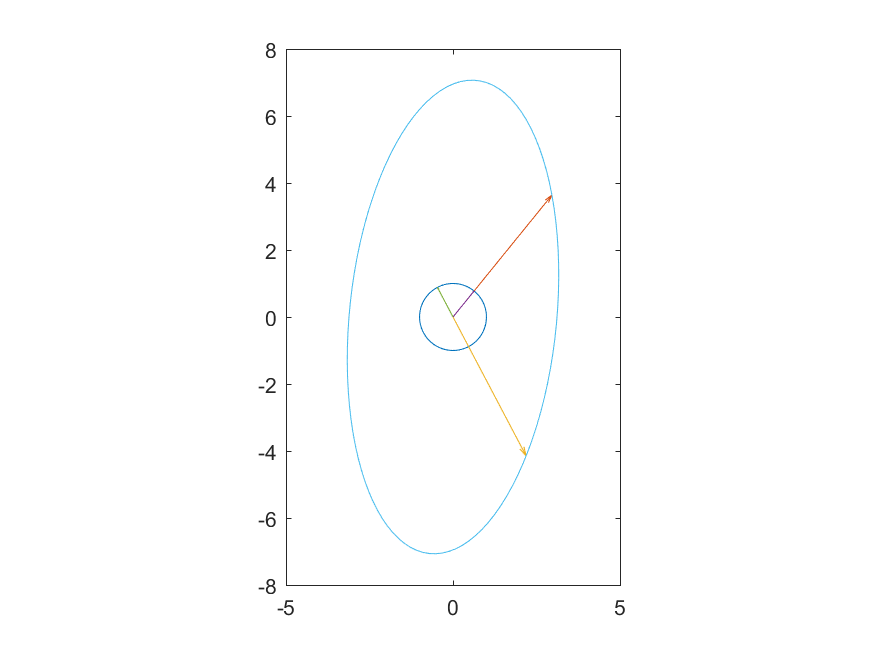

In [6]:
imatlab_export_fig('print-png');
A = [1 3; 7 -1];
[v d] = eig(A)
lambda=diag(d);
x1=v(:,[1]);
x2=v(:,[2]);
b1=lambda([1])*x1;
b2=lambda([2])*x2;
t = linspace(0,2*pi);
x = [ cos(t); sin(t) ];
b = A*x;
plot(x([1],:),x([2],:));
hold on
quiver(0,0,b1(1),b1(2), 0);
quiver(0,0,b2(1),b2(2), 0);
quiver(0,0,x1(1),x1(2), 0);
quiver(0,0,x2(1),x2(2), 0);
plot(b([1],:),b([2],:));
hold off
daspect([1 1 1])


u =

   -0.0985   -0.9951
   -0.9951    0.0985


s =

    7.0990         0
         0    3.0990


v =

   -0.9951   -0.0985
    0.0985   -0.9951



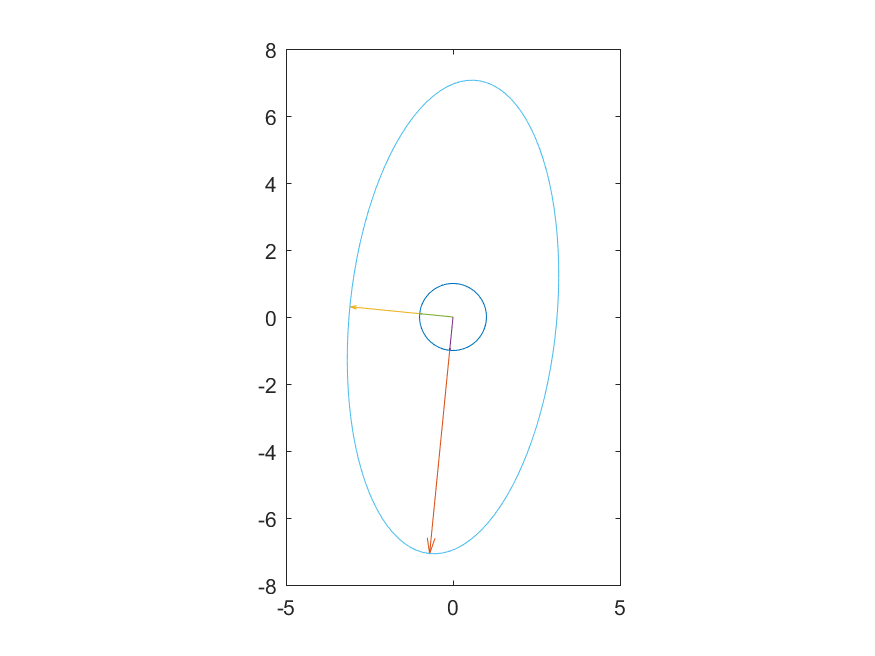

In [4]:
imatlab_export_fig('print-png');
A = [1 3; 7 -1];
[u s v] = svd(A)
lambda=diag(s);
x1=u(:,[1]);
x2=u(:,[2]);
b1=lambda([1])*x1;
b2=lambda([2])*x2;
t = linspace(0,2*pi);
x = [ cos(t); sin(t) ];
b = A*x;
plot(x([1],:),x([2],:));
hold on
quiver(0,0,b1(1),b1(2), 0);
quiver(0,0,b2(1),b2(2), 0);
quiver(0,0,x1(1),x1(2), 0);
quiver(0,0,x2(1),x2(2), 0);
plot(b([1],:),b([2],:));
hold off
daspect([1 1 1])

#### (c) Compare your answers to parts (a) and (b) and draw a conclusion.

The components of the SVD represent the shape of the transform, indicating the major and minor axis of the ellipse, whereas the spectral decomposition is not as geometrically meaningful.

### 3 Numerically Solving Hilbert Systems: A Hilbert system is a set of linear equations $Hx = b$, where $H$ is the Hilbert matrix (this means: $\begin{align}H_{ij} = 1/(i+j −1) & \forall i, j ≥ 1\end{align}$). For Hilbert matrices of dimension n = 10, 15, 20, try the following experiment:

In [6]:
eps


ans =

   2.2204e-16



#### (a) Compute and save $H^{−1}$. (Use the MatLab command inv for matrix inversion.)


#### (b) Set $b = [1, 2, . . . , n]^T$


#### (c) Compute $x = H^{−1}b$


#### (d) Compute $bb := Hx$.


In [7]:
n = 10;
H = hilb(n);
iH = inv(H);
b = linspace(1, n, n).'
x = iH*b
bb = H*x


b =

     1
     2
     3
     4
     5
     6
     7
     8
     9
    10


x =

   1.0e+08 *

   -0.0000
    0.0010
   -0.0233
    0.2330
   -1.2106
    3.5940
   -6.3222
    6.5103
   -3.6227
    0.8405


bb =

    1.0001
    2.0001
    3.0001
    4.0001
    5.0001
    6.0001
    7.0001
    8.0001
    9.0001
   10.0001



In [8]:
n = 15;
H = hilb(n);
iH = inv(H);
b = linspace(1, n, n).'
x = iH*b
bb = H*x


b =

     1
     2
     3
     4
     5
     6
     7
     8
     9
    10
    11
    12
    13
    14
    15


x =

   1.0e+10 *

    0.0000
   -0.0000
    0.0009
   -0.0129
    0.0917
   -0.3449
    0.5842
    0.2451
   -2.8337
    4.3313
   -0.4098
   -6.4435
    8.4204
   -4.5973
    0.9684


bb =

   10.5181
    4.5068
    3.2783
    3.1009
    3.4141
    4.0027
    4.7570
    5.6148
    6.5392
    7.5070
    8.5037
    9.5196
   10.5482
   11.5853
   12.6278



In [14]:
n = 20;
H = hilb(n);
iH = inv(H);
b = linspace(1, n, n).'
x = iH*b
bb = H*x


b =

     1
     2
     3
     4
     5
     6
     7
     8
     9
    10
    11
    12
    13
    14
    15
    16
    17
    18
    19
    20


x =

   1.0e+12 *

    0.0000
   -0.0000
    0.0001
   -0.0019
    0.0168
   -0.0873
    0.2707
   -0.4806
    0.3946
   -0.0036
    0.1047
   -0.9998
    1.4091
   -0.7873
    0.4672
   -0.5454
   -0.1398
    0.9149
   -0.7075
    0.1750


bb =

   49.5140
   25.0212
   22.5622
   20.6523
   19.3404
   18.6339
   18.3976
   18.4965
   18.8279
   19.3199
   19.9233
   20.6050
   21.3421
   22.1193
   22.9255
   23.7534
   24.5977
   25.4545
   26.3211
   27.1955

